In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils

from utils.data import load_whole_train_data

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

In [2]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
K.set_session(session)  # set this TensorFlow session as the default session for Keras

In [3]:
x, y = load_whole_train_data()

x = x.reshape(x.shape[0], 16, 8, 1)
y = utils.to_categorical(y - 1, 8)

print(x.shape)
print(y.shape)

(1440000, 16, 8, 1)
(1440000, 8)


In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(16, 8, 1), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 8, 32)         320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 8, 32)         9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 4, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 4, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 4, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 2, 64)          0

In [5]:
history = model.fit(x, y, batch_size=256, epochs=60, validation_split=0.01)

Train on 1425600 samples, validate on 14400 samples
Epoch 1/60
1425600/1425600 [==============================] - 41s 28us/sample - loss: 1.3520 - accuracy: 0.4750 - val_loss: 1.1653 - val_accuracy: 0.5841
Epoch 2/60
1425600/1425600 [==============================] - 38s 27us/sample - loss: 1.0811 - accuracy: 0.5896 - val_loss: 1.0608 - val_accuracy: 0.6139
Epoch 3/60
1425600/1425600 [==============================] - 39s 27us/sample - loss: 1.0091 - accuracy: 0.6193 - val_loss: 1.0322 - val_accuracy: 0.6092
Epoch 4/60
1425600/1425600 [==============================] - 39s 27us/sample - loss: 0.9694 - accuracy: 0.6352 - val_loss: 0.8817 - val_accuracy: 0.6690
Epoch 5/60
1425600/1425600 [==============================] - 39s 27us/sample - loss: 0.9465 - accuracy: 0.6445 - val_loss: 0.9226 - val_accuracy: 0.6552
Epoch 6/60
1425600/1425600 [==============================] - 39s 27us/sample - loss: 0.9281 - accuracy: 0.6519 - val_loss: 0.8928 - val_accuracy: 0.6620
Epoch 7/60
1425600/14256

1425600/1425600 [==============================] - 25s 18us/sample - loss: 0.8000 - accuracy: 0.7036 - val_loss: 0.9854 - val_accuracy: 0.6849
Epoch 54/60
1425600/1425600 [==============================] - 25s 17us/sample - loss: 0.7998 - accuracy: 0.7034 - val_loss: 0.9115 - val_accuracy: 0.6669
Epoch 55/60
1425600/1425600 [==============================] - 25s 18us/sample - loss: 0.7988 - accuracy: 0.7038 - val_loss: 0.8476 - val_accuracy: 0.6907
Epoch 56/60
1425600/1425600 [==============================] - 25s 18us/sample - loss: 0.7995 - accuracy: 0.7035 - val_loss: 1.0425 - val_accuracy: 0.6794
Epoch 57/60
1425600/1425600 [==============================] - 25s 18us/sample - loss: 0.7982 - accuracy: 0.7042 - val_loss: 0.8827 - val_accuracy: 0.6881
Epoch 58/60
1425600/1425600 [==============================] - 26s 18us/sample - loss: 0.7969 - accuracy: 0.7045 - val_loss: 0.8875 - val_accuracy: 0.6863
Epoch 59/60
1425600/1425600 [==============================] - 25s 18us/sample - l

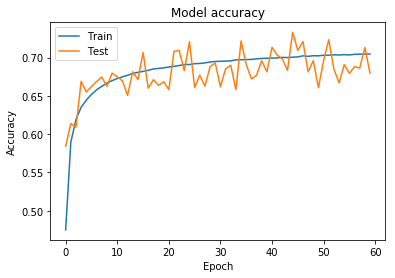

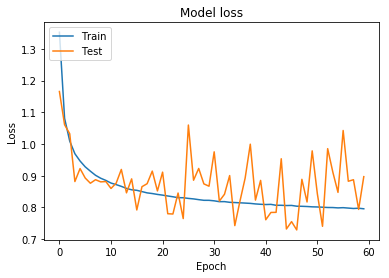

In [6]:
model_file = './models/capg_vgg.h5'
model.save(model_file)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [7]:
# load model
model = keras.models.load_model(model_file)
model.summary()
# loss, acc = new_model.evaluate(test_images, test_labels)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 8, 32)         320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 8, 32)         9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 4, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 4, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 4, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 2, 64)          0